In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("18-concrete_data.csv")

In [3]:
df.head()

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30

In [4]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [6]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [7]:
df.corr()

Cement  Blast Furnace Slag   Fly Ash     Water  \
Cement              1.000000           -0.275216 -0.397467 -0.081587   
Blast Furnace Slag -0.275216            1.000000 -0.323580  0.107252   
Fly Ash            -0.397467           -0.323580  1.000000 -0.256984   
Water              -0.081587            0.107252 -0.256984  1.000000   
Superplasticizer    0.092386            0.043270  0.377503 -0.657533   
Coarse Aggregate   -0.109349           -0.283999 -0.009961 -0.182294   
Fine Aggregate     -0.222718           -0.281603  0.079108 -0.450661   
Age                 0.081946           -0.044246 -0.154371  0.277618   
Strength            0.497832            0.134829 -0.105755 -0.289633   

                    Superplasticizer  Coarse Aggregate  Fine Aggregate  \
Cement                      0.092386         -0.109349       -0.222718   
Blast Furnace Slag          0.043270         -0.283999       -0.281603   
Fly Ash                     0.377503         -0.009961        0.079108   
Water                      -0.657533         -0.182294       -0.450661   
Superplasticizer            1.000000         -0.265999        0.222691   
Coarse Aggregate           -0.265999          1.000000       -0.178481   
Fine Aggregate              0.222691         -0.178481        1.000000   
Age                        -0.192700         -0.003016       -0.156095   
Strength                    0.366079         -0.164935       -0.167241   

                         Age  Strength  
Cement              0.081946  0.497832  
Blast Furnace Slag -0.044246  0.134829  
Fly Ash            -0.154371 -0.105755  
Water               0.277618 -0.289633  
Superplasticizer   -0.192700  0.366079  
Coarse Aggregate   -0.003016 -0.164935  
Fine Aggregate     -0.156095 -0.167241  
Age                 1.000000  0.328873  
Strength            0.328873  1.000000

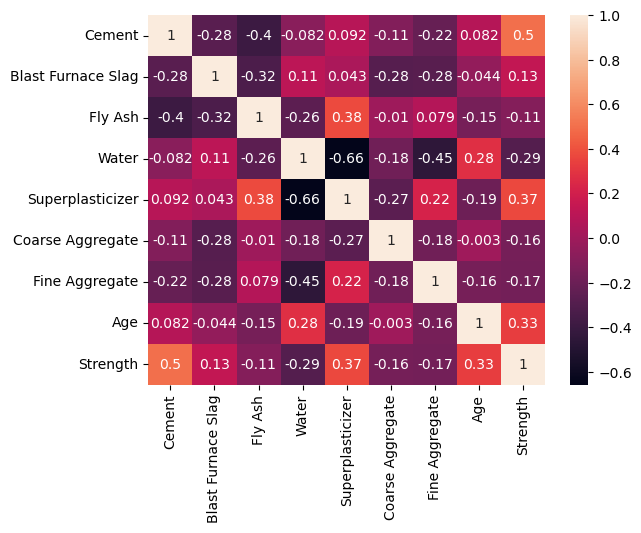

In [8]:
sns.heatmap(df.corr(),annot=True)
plt.show()

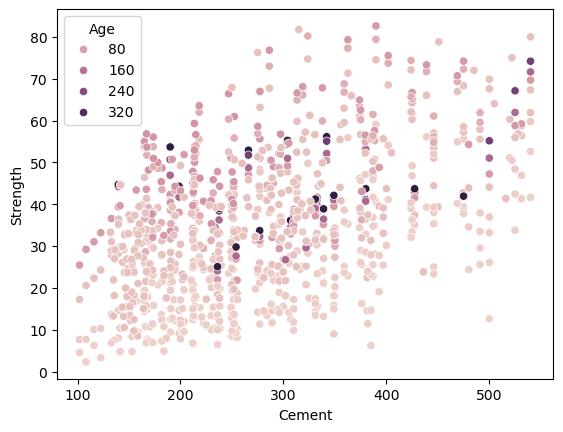

In [9]:
sns.scatterplot(data = df,x="Cement",y="Strength",hue="Age")
plt.show()

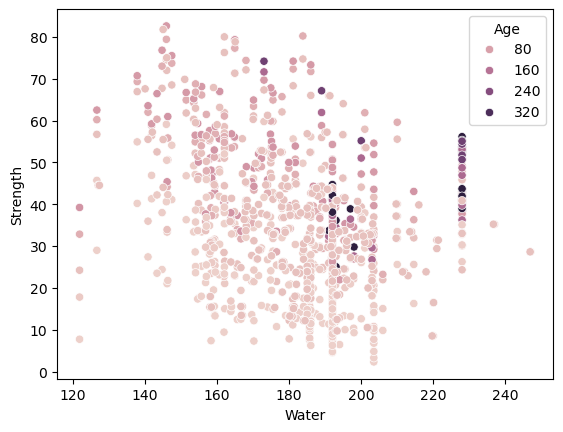

In [10]:
sns.scatterplot(data = df,x="Water",y="Strength",hue="Age")
plt.show()

In [11]:
X=df.drop("Strength",axis=1)
y=df["Strength"]

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [14]:
#first weak learner 
tree_reg1 = DecisionTreeRegressor(max_depth=3)
tree_reg1.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [15]:
y2 = y_train - tree_reg1.predict(X_train)

In [16]:
y2[:5]

995    2.765000
507    0.950179
334    8.148222
848   -5.317425
294   -8.251778
Name: Strength, dtype: float64

In [17]:
#second weak learner

In [18]:
tree_reg2 = DecisionTreeRegressor (max_depth=4)
tree_reg2.fit(X_train,y2)

DecisionTreeRegressor(max_depth=4)

In [19]:
y3 = y2 -tree_reg2.predict(X_train)
y3[:5]

995    2.456058
507    7.533870
334    2.490710
848   -5.626367
294   -8.560719
Name: Strength, dtype: float64

In [20]:
#third weak learner
tree_reg3 = DecisionTreeRegressor(max_depth=4)
tree_reg3.fit(X_train,y3)

DecisionTreeRegressor(max_depth=4)

In [21]:
y4 = y3 - tree_reg3.predict(X_train)
y4[:5]

995     3.428753
507     8.250299
334    -1.585616
848   -11.693124
294    -7.588025
Name: Strength, dtype: float64

In [22]:
y_pred = sum( tree.predict(X_test) for tree in (tree_reg1,tree_reg2,tree_reg3))

In [23]:
from sklearn.metrics import r2_score

In [24]:
r2_score(y_test,y_pred)

0.7367720957830413

In [25]:
tree_reg4 = DecisionTreeRegressor(max_depth=4)
tree_reg4.fit(X_train,y4)

DecisionTreeRegressor(max_depth=4)

In [26]:
y_pred = sum( tree.predict(X_test) for tree in (tree_reg1,tree_reg2,tree_reg3,tree_reg4))

In [27]:
r2_score(y_test,y_pred)

0.7580168765614319

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

In [29]:
gbr = GradientBoostingRegressor(n_estimators=3,max_depth=3,learning_rate=0.1)

In [30]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=3)

In [32]:
y_pred = gbr.predict(X_test)
r2_score(y_test,y_pred)

0.2733692861370759

In [33]:
gbr = GradientBoostingRegressor(n_estimators=100,max_depth=3,learning_rate=0.1)

In [35]:
gbr.fit(X_train,y_train)
y_pred=gbr.predict(X_test)
r2_score(y_test,y_pred)

0.8834941227892963

In [36]:
#hyperparameter tuning

In [37]:
params = {
    "n_estimators" : [100,150,200],
    "max_depth":[3,4,5],
    "loss":["squared_error","huber","quantile"],
    "learning_rate" : [0.01,0.1,0.5]
}

In [38]:
from sklearn.model_selection import RandomizedSearchCV

In [41]:
rscv = RandomizedSearchCV(estimator=GradientBoostingRegressor(),param_distributions=params,cv=5)

In [43]:
rscv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5],
                                        'loss': ['squared_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 150, 200]})

In [44]:
rscv.best_params_

{'n_estimators': 150, 'max_depth': 4, 'loss': 'huber', 'learning_rate': 0.1}

In [45]:
y_pred = rscv.predict(X_test)
r2_score(y_test,y_pred)

0.9166544790622848